In [17]:
#Import bibs
import pandas as pd
import numpy as np
import progressbar
import matplotlib.pyplot as plt
%matplotlib notebook
import itertools
import os
import sys
from IPython.display import display, HTML

In [18]:
#Import funtions
sys.path.insert(0, '../PUEL_GIT/transients_classifier/Implementation_Events_Kopie/')
from Event_detection_functions import *

In [22]:
#Set up the date to plot
day = '08'
month = '07'
year = '2017'
date_HDF5 = year+'-'+month+'-'+day

In [23]:
#Import corresponding HDF5 files for the date and convert them to minute values
Phase_1,P_Phase_1=[],[]
Phase_2,P_Phase_2=[],[]
Phase_3,P_Phase_3=[],[]
Phase_dictionary = {1:Phase_1, 2:Phase_2,3:Phase_3}
for Phase in [1,2,3]:
    Phase_dictionary[Phase]=pd.read_hdf('../HDF5/'+date_HDF5+'/phase_'+str(Phase)+'_' + date_HDF5+'.h5',columns =['P', 'timestamps'])
    Phase_dictionary[Phase]=Phase_dictionary[Phase].groupby(np.arange(len(Phase_dictionary[Phase]))//300).mean()

In [ ]:
#Simulate event detection code
Event_df = pd.DataFrame(columns = ['timestamp','Phase','minuten_index',
                                   'Ladevorgang', 'Status', 'Ladeleistung',
                                   'minuten_index_Abschaltung','timestamp_abschalt'])
backtrack_timesteps=7
with progressbar.ProgressBar(max_value=len(Phase_dictionary[1])) as bar:
    for minute_day in range(2,max(len(Phase_dictionary[1]),len(Phase_dictionary[2]),len(Phase_dictionary[3]))):
        bar.update(minute_day)
        # Insert this in the update routine after the power_today_minute.csv export
        # The following variables have to be set to the corresponding dataframe in the environment (export to power_today_minute_x.csv)
        phase_dict = {1:P_Phase_1, 2:P_Phase_2, 3:P_Phase_3}
        for Phase in [1,2,3]:
            phase_dict[Phase]=Phase_dictionary[Phase][max(0,minute_day-backtrack_timesteps):minute_day]
            pseudocode_df = phase_dict[Phase]
            pseudocode_df['P_delta'] = phase_dict[Phase].P.diff()
            Event_df = detect_switch_event(pseudocode_df, Phase, Event_df)

N/A% (0 of 1441) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
 64% (931 of 1441) |##############         | Elapsed Time: 0:02:25 ETA: 0:01:14../PUEL_GIT/transients_classifier/Implementation_Events_Kopie\Event_detection_functions.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  only_load_event_df['deviation_P'] = only_load_event_df['Ladeleistung'].apply(lambda ladeleistung_auto: ab

<IPython.core.display.Javascript object>


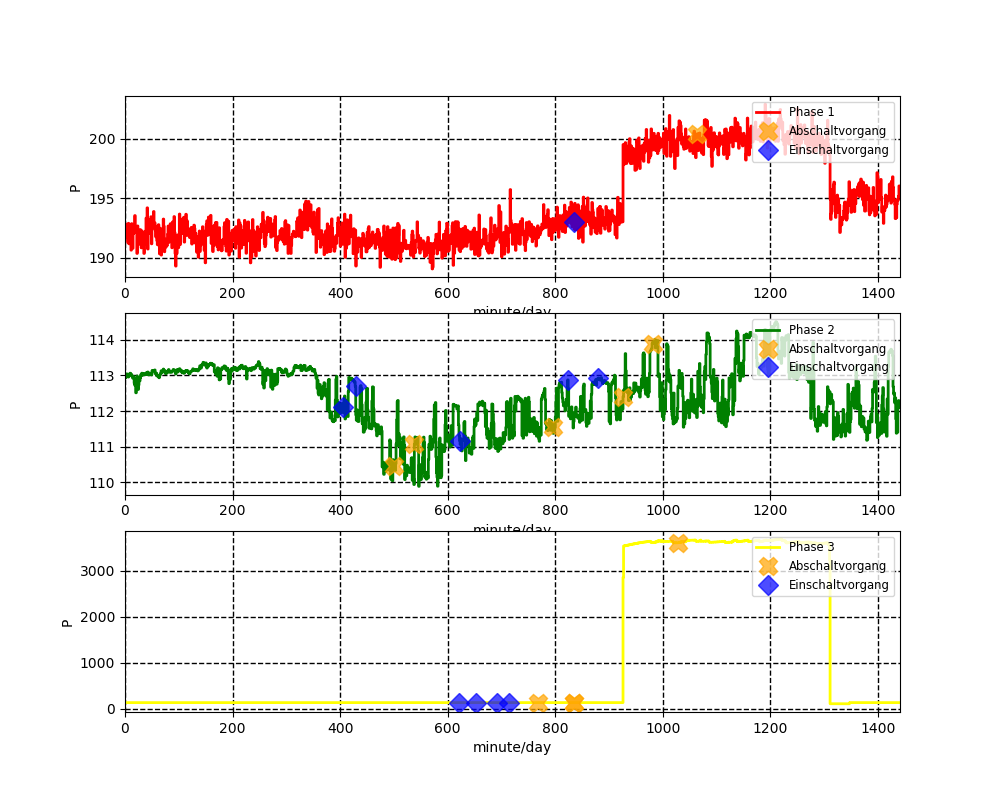

In [25]:
colors_phase = ['red','green','yellow']
plt.figure(figsize=(10,8))
for Phase in [1,2,3]:
    Phase_P = Phase_dictionary[Phase]
    plt.subplot(310+Phase)
    plt.step(Phase_P.index,Phase_P['P'], color=colors_phase[Phase-1], linewidth=2, label='Phase '+str(Phase))
    plt.plot(Event_df[Event_df.Phase == Phase]['minuten_index_Abschaltung'], Phase_P.iloc[Event_df[Event_df.Phase == Phase]['minuten_index_Abschaltung']+1]['P'], "X",color="orange", markersize=13,alpha=.7, label='Abschaltvorgang')
    plt.plot(Event_df[Event_df.Phase == Phase]['minuten_index'], Phase_P.iloc[Event_df[Event_df.Phase == Phase]['minuten_index']]['P'], "D", color="blue", markersize=10,alpha=.7, label='Einschaltvorgang')
    plt.legend(loc='upper right', frameon=True, fontsize = 'small')
    plt.grid(color='k', linestyle='--', linewidth=1)
    plt.xlim([0,len(Phase_P)])
    plt.ylabel('P')
    plt.xlabel('minute/day')